In [99]:
import numpy as np
import seaborn as sns
import pandas as pd

In [100]:
df=pd.read_csv("skoda.csv")

In [101]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5


In [102]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2017.502314,14275.449338,20118.452050,117.407053,56.589165,1.433509
std,1.734754,6332.051106,19955.410762,53.267949,12.037576,0.394800
min,2004.000000,995.000000,5.000000,0.000000,30.100000,0.000000
25%,2017.000000,9495.000000,5812.500000,125.000000,50.400000,1.000000
50%,2018.000000,12998.000000,14653.000000,145.000000,57.700000,1.400000
75%,2019.000000,17990.000000,28000.000000,145.000000,62.800000,2.000000
max,2020.000000,91874.000000,300000.000000,325.000000,201.800000,2.500000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6267 non-null   object 
 1   year          6267 non-null   int64  
 2   price         6267 non-null   int64  
 3   transmission  6267 non-null   object 
 4   mileage       6267 non-null   int64  
 5   fuelType      6267 non-null   object 
 6   tax           6267 non-null   int64  
 7   mpg           6267 non-null   float64
 8   engineSize    6267 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 440.8+ KB


In [105]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5


In [106]:
x=df[df['year']>2015]
x



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5
5,Yeti Outdoor,2017,13250,Automatic,47005,Diesel,145,51.4,2.0
...,...,...,...,...,...,...,...,...,...
6260,Scala,2019,16990,Semi-Auto,430,Petrol,145,47.1,1.0
6261,Octavia,2018,12480,Manual,30805,Petrol,145,57.7,1.5
6264,Fabia,2017,9500,Semi-Auto,17131,Petrol,145,61.4,1.0
6265,Citigo,2016,5999,Manual,21747,Petrol,20,62.8,1.0


In [195]:
x.isnull().sum()



engineSize    0
price         0
mileage       0
mpg           0
dtype: int64

<Axes: >

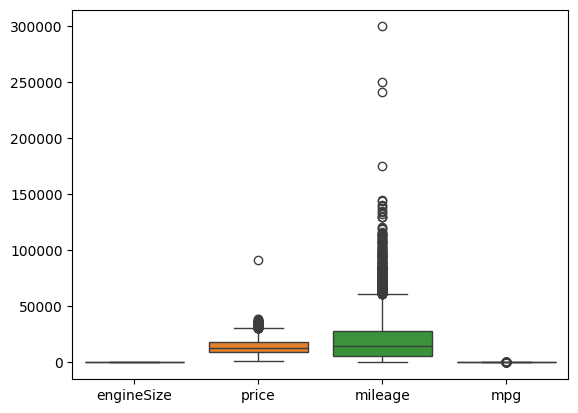

In [196]:
sns.boxplot(x)

In [198]:
t=df['mileage'].median()
print(t)

14653.0


In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import math

In [200]:
X=df[['engineSize','price','mileage','mpg']]
y=df['model']

In [201]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [182]:
n=len(df)
print(n)
m=math.sqrt(n)
print(m)

6267
79.16438593205912


In [202]:
scaler=StandardScaler()
scaler.fit(X_train)
xx=scaler.transform(X_train)
xxx=scaler.transform(X_test)

In [203]:
model=KNeighborsClassifier(n_neighbors=77,algorithm='auto')
model.fit(X_train,y_train)

,n_neighbors,77
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [204]:
y_predict=model.predict(xxx)


d:\DATA_SCIENCE\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [205]:
acc=accuracy_score(y_test,y_predict)
print(acc)

0.0773524720893142


In [206]:
cn=confusion_matrix(y_test,y_predict)
print(cn)

[[ 97   0   0   0   0   0   0   0   0   0   0   0]
 [323   0   0   0   0   0   0   0   0   0   0   0]
 [ 24   0   0   0   0   0   0   0   0   0   0   0]
 [ 92   0   0   0   0   0   0   0   0   0   0   0]
 [101   0   0   0   0   0   0   0   0   0   0   0]
 [291   0   0   0   0   0   0   0   0   0   0   0]
 [ 22   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0]
 [ 22   0   0   0   0   0   0   0   0   0   0   0]
 [170   0   0   0   0   0   0   0   0   0   0   0]
 [ 23   0   0   0   0   0   0   0   0   0   0   0]
 [ 88   0   0   0   0   0   0   0   0   0   0   0]]
